## Binary Classification
#### Step 1) Linear regression with H(x) = Wx + b
#### Step 2) Logistic / sigmoid function (sig(t)) based on the result of Step 1.

In [1]:
from IPython.display import Image

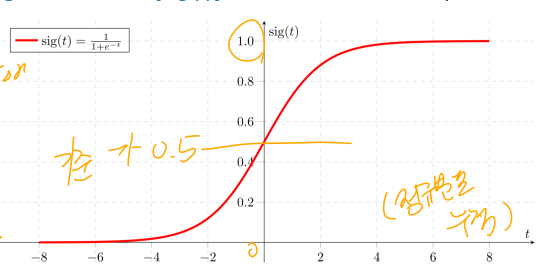

In [2]:
Image("img/binary Classification.png")

위와 같이 Sigmoid함수는 sig(t)의 0.5 기준으로 binary Classification을 수행하는 것이 가능!! 제일 이상적인 방법!! 그러므로 binary Classification에서는 sigmoid 함수를 씌워 진행한다. 이렇게  Linear Regression Model과 Logistic/sigmoid 함수를 결합하여 아래와 같은 수식으로 Modeling을 할 수 있다.


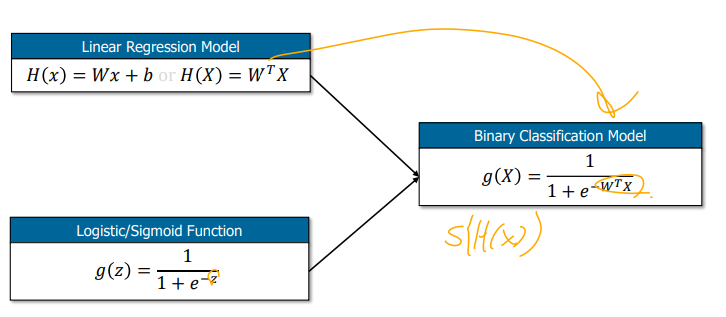

In [3]:
Image("img/binary Classification Model.png")

 하지만!! 이때의 기존의 MSE Cost Function은 Convex가 아니므로, 
## 새로운 Cost Function이 필요!!  => Log Fuction 사용!!
log함수를 통해 w 추출이 쉬워 손실함수로써의 역할을 한다!

In [4]:
import tensorflow as tf
import numpy as np
x_train = np.array([[1,2],[2,3],[3,4],[4,4],[5,3],[6,2]], dtype = np.float32)
y_train = np.array([[0],[0],[0],[1],[1],[1]],dtype = np.float32)
W = tf.Variable(tf.random.normal([2,1]))
b = tf.Variable(tf.random.normal([1]))

In [8]:
def model_BinaryClassification(x):
    return tf.sigmoid(tf.matmul(x,W)+b) # 시그모이드에 모델을 적용하여 이진분류

def cost_BinaryClassification(model_x): # model_x를 받아 이진분류모델의 손실함수인 cross-entropy를 계산하여 반환
    return tf.reduce_mean((-1)*y_train*tf.math.log(model_x)+(-1)*(1.-y_train)*tf.math.log(1.-model_x))

def train_optimization(x): 
    with tf.GradientTape() as g: # gradient 계산하고 손실에 대한 W와 b의 gradient를 구함
        model = model_BinaryClassification(x) 
        cost = cost_BinaryClassification(model)
    gradients = g.gradient(cost,[W,b])
    tf.optimizers.SGD(0.01).apply_gradients(zip(gradients,[W,b])) #경사하강법 객체 생성 후 .gradient를 적용해 W와 b업데이트
    
for step in range(2001):
    train_optimization(x_train) # 모델 학습
    if step%100 == 0:
        pred = model_BinaryClassification(x_train)
        loss = cost_BinaryClassification(pred)
        prediction = tf.cast(pred>0.5,dtype=tf.float32) # 0.5 기준으로 이진분류
        accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction,y_train),dtype=tf.float32))
        print("Step: {},\t Accuracy: {},\t Loss: {}".format(step,accuracy.numpy().flatten(),loss))
        
print('='*100) 
x_test = np.array([[6,1]],dtype=np.float32)
model_test = model_BinaryClassification(x_test)

print("model for [6,1]: ",model_test.numpy())
print('='*100)

Step: 0,	 Accuracy: [0.5],	 Loss: 1.25799560546875
Step: 100,	 Accuracy: [0.8333333],	 Loss: 0.5360304117202759
Step: 200,	 Accuracy: [1.],	 Loss: 0.427444189786911
Step: 300,	 Accuracy: [1.],	 Loss: 0.36507150530815125
Step: 400,	 Accuracy: [1.],	 Loss: 0.32442212104797363
Step: 500,	 Accuracy: [1.],	 Loss: 0.29538029432296753
Step: 600,	 Accuracy: [1.],	 Loss: 0.27324554324150085
Step: 700,	 Accuracy: [1.],	 Loss: 0.2555759847164154
Step: 800,	 Accuracy: [1.],	 Loss: 0.24098201096057892
Step: 900,	 Accuracy: [1.],	 Loss: 0.22861330211162567
Step: 1000,	 Accuracy: [1.],	 Loss: 0.21791845560073853
Step: 1100,	 Accuracy: [1.],	 Loss: 0.20852291584014893
Step: 1200,	 Accuracy: [1.],	 Loss: 0.2001621276140213
Step: 1300,	 Accuracy: [1.],	 Loss: 0.19264362752437592
Step: 1400,	 Accuracy: [1.],	 Loss: 0.18582294881343842
Step: 1500,	 Accuracy: [1.],	 Loss: 0.17958970367908478
Step: 1600,	 Accuracy: [1.],	 Loss: 0.1738572120666504
Step: 1700,	 Accuracy: [1.],	 Loss: 0.16855691373348236
Step: